In [1]:
import json
import glob
import matplotlib.pylab as plt

In [2]:
result_dir = '/disk/data/models/results/tgt/'

In [3]:
files = glob.glob(result_dir+'*')
print(files)

# ko_fname = '/disk/data/models/results/tgt/ko_for_ko_with_masking_tgt_result.txt'
# en_fname = '/disk/data/models/results/en_for_en_with_masking_result.txt'

# ko_fname = '/disk/data/models/results/tgt/ko_for_ko_tgt_result.txt'
# en_fname = '/disk/data/models/results/tgt/en_for_en_tgt_result.txt'

# ko_fname = '/disk/data/models/results/tgt/ko_for_ko_with_masking_tgt_result.txt'
# en_fname = '/disk/data/models/results/tgt/en_for_en_with_masking_tgt_result.txt'

# en_fname = '/disk/data/models/results/tgt/en_for_en_with_masking_large_tgt_result.txt'
# en_fname = '/disk/data/models/results/tgt/en_for_en_large_tgt_result.txt'

# ko_fname = '/disk/data/models/results/multilingual/multilingual_for_ko_with_masking_tgt_result.txt'
# en_fname = '/disk/data/models/results/multilingual/multilingual_for_en_with_masking_tgt_result.txt'

# ko_fname = '/disk/data/models/results/multilingual/multilingual_for_ko_tgt_result.txt'
# en_fname = '/disk/data/models/results/multilingual/multilingual_for_en_tgt_result.txt'

# ko_fname = '/disk/data/models/results/multilingual/multilingual_for_ko_tgt_result.txt'
# en_fname = '/disk/data/models/eval_result/en_with_exem_for_en_with_masking_result.txt'

ko_fname = '/disk/data/models/framenet/eval_result/ko_for_ko_with_masking.txt'
en_fname = '/disk/data/models/framenet/eval_result/mul_for_ko_with_masking.txt'

['/disk/data/models/results/tgt/en_for_en_large_tgt_result.txt', '/disk/data/models/results/tgt/en_for_ko_with_masking_tgt_result.txt', '/disk/data/models/results/tgt/ko_for_ko_with_masking_tgt_result.txt', '/disk/data/models/results/tgt/en_for_en_tgt_result.txt', '/disk/data/models/results/tgt/ko_for_en_tgt_result.txt', '/disk/data/models/results/tgt/ko_for_en_with_masking_tgt_result.txt', '/disk/data/models/results/tgt/ko_for_ko_tgt_result.txt', '/disk/data/models/results/tgt/en_for_en_with_masking_large_tgt_result.txt', '/disk/data/models/results/tgt/en_for_en_with_masking_tgt_result.txt']


In [4]:
def get_result(fname):
    with open(fname,'r') as f:
        d = f.readlines()
    model = fname.split('/')[-1]

    print(model)
    n = 0

    results = []
    for line in d:
        line = line.strip()
        if n == 0:
            items = line.split('\t')
        else:
            result = line.split('\t')
            results.append(result)
        n+=1

    fids, argids = [], []
    for i in range(len(results)):
        item = results[i]
        epoch, fid_score, f1_score = int(item[0]), round(float(item[1]), 4)*100, round(float(item[7]),4)*100

        fid = (epoch, fid_score)
        argid = (epoch, f1_score)
        fids.append(fid)
        argids.append(argid)

        fids.sort(key=lambda element: element[0])
        argids.sort(key=lambda element: element[0])

    e, f, a = [],[],[]
    for i in range(len(fids)):
        epoch = fids[i][0]
        fid = fids[i][1]
        argid = argids[i][1]

        e.append(epoch)
        f.append(fid)
        a.append(argid)
    return (e,f,a)

In [5]:
ko_result = get_result(ko_fname)
en_result = get_result(en_fname)

epochs = ko_result[0]

ko_for_ko_with_masking.txt
mul_for_ko_with_masking.txt


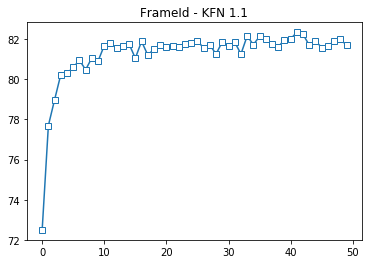

In [6]:
plt.title('FrameId - KFN 1.1')
plt.plot(epochs, ko_result[1], '-s', MarkerFaceColor='white')
plt.show()

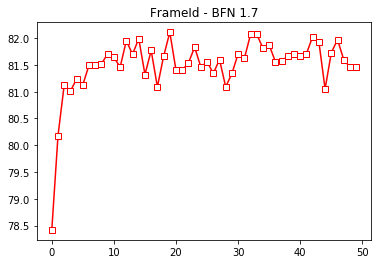

In [7]:
plt.title('FrameId - BFN 1.7')
plt.plot(epochs, en_result[1], '-rs', MarkerFaceColor='white')
plt.show()

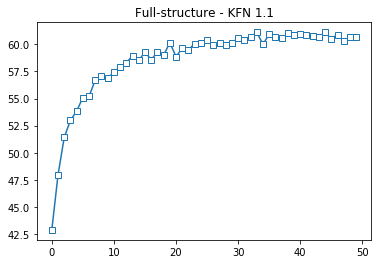

In [8]:
plt.title('Full-structure - KFN 1.1')
plt.plot(epochs, ko_result[2], '-s', MarkerFaceColor='white')
plt.show()

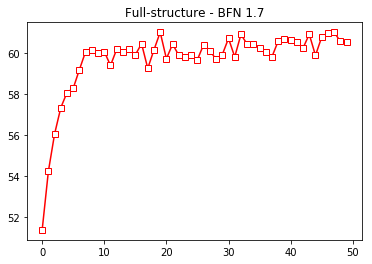

In [9]:
plt.title('Full-structure - BFN 1.7')
plt.plot(epochs, en_result[2], '-rs', MarkerFaceColor='white')
plt.show()

In [10]:
for i in range(len(epochs)):
    epoch = epochs[i]
    fid = ko_result[1][i]
    full = ko_result[2][i]
    print(epoch, fid, full)

0 72.50999999999999 42.870000000000005
1 77.69 47.93
2 78.97 51.41
3 80.22 52.99
4 80.28 53.839999999999996
5 80.58 55.089999999999996
6 80.93 55.2
7 80.46 56.71000000000001
8 81.05 57.099999999999994
9 80.89 56.85
10 81.66 57.45
11 81.77 57.9
12 81.52000000000001 58.32000000000001
13 81.62 58.93000000000001
14 81.73 58.52
15 81.03 59.3
16 81.87 58.589999999999996
17 81.19 59.28
18 81.47999999999999 58.989999999999995
19 81.69999999999999 60.160000000000004
20 81.6 58.879999999999995
21 81.66 59.63
22 81.58 59.51
23 81.75 60.07
24 81.81 60.160000000000004
25 81.91000000000001 60.36
26 81.52000000000001 59.91
27 81.67999999999999 60.089999999999996
28 81.24 59.98
29 81.85 60.160000000000004
30 81.64 60.58
31 81.83 60.42999999999999
32 81.24 60.67
33 82.13000000000001 61.12
34 81.71000000000001 60.0
35 82.11 60.96
36 81.97 60.68
37 81.73 60.57
38 81.6 61.01
39 81.93 60.89
40 81.99 60.92999999999999
41 82.32000000000001 60.9
42 82.21000000000001 60.809999999999995
43 81.67999999999999 60.

In [11]:
for i in range(len(epochs)):
    epoch = epochs[i]
    fid = en_result[1][i]
    full = en_result[2][i]
    print(epoch, fid, full)

0 78.42 51.370000000000005
1 80.17999999999999 54.230000000000004
2 81.13 56.05
3 81.01 57.330000000000005
4 81.24 58.07
5 81.13 58.28
6 81.5 59.19
7 81.5 60.07
8 81.52000000000001 60.160000000000004
9 81.71000000000001 60.019999999999996
10 81.64 60.07
11 81.46 59.39
12 81.95 60.18
13 81.69999999999999 60.06
14 81.99 60.17
15 81.32000000000001 59.91
16 81.77 60.45
17 81.08999999999999 59.25
18 81.66 60.150000000000006
19 82.11 61.01
20 81.39999999999999 59.72
21 81.39999999999999 60.42999999999999
22 81.54 59.88
23 81.83 59.809999999999995
24 81.46 59.89
25 81.56 59.68
26 81.34 60.41
27 81.6 60.11
28 81.08999999999999 59.69
29 81.34 59.919999999999995
30 81.71000000000001 60.709999999999994
31 81.62 59.809999999999995
32 82.07 60.9
33 82.07 60.42999999999999
34 81.81 60.46
35 81.87 60.25
36 81.56 60.06
37 81.58 59.81999999999999
38 81.66 60.58
39 81.71000000000001 60.69
40 81.66 60.629999999999995
41 81.71000000000001 60.550000000000004
42 82.03 60.24
43 81.93 60.91
44 81.05 59.88
45 